##Lab 01 Getting Started 

#Kiến thức

Ta gọi $x_i=[1,x_{i_1},x_{i_2},...,x_{i_n}]$ là một sample có $n$ features (1 là bias). $X=[x_1,x_2,...,x_N]$ là bộ dữ liệu với $N$ samples. $Y=[y_1,y_2,...,y_N]$ là target values. 

Ta cần xây dựng một mô hình hồi quy: 

$$\hat{Y}=XW$$

Với $W\in R^{n+1\times 1}$ là một ma trận chứa các weights cần học. $Y\in R^{N\times 1}$, $X\in R^{N\times n+1}$. lưu ý nếu target value (hay $y$) là một vector thì ta sẽ thay $1$ bằng $m$ với $m$ là số chiều của vector $y$

Ta định nghĩa hàm Loss: 
$$L=\frac{1}{2}(\hat{Y}-Y)^2=\frac{1}{2}(XW-Y)^2$$

Đến đây ta muốn $Y$ và $\hat{Y}$ càng ngày gần nhau do đó ta sẽ tìm W sao cho L nhỏ nhất. Ta sẽ lấy đạo hàm của L theo W ta được
$$X^{T}(XW-y)$$
cho phương trình trên bằng 0 và giải ra ta được:
$$W=(X^{T}X)^{-1}X^Ty$$

Ta luôn giả sử $X^TX$ khả nghịch


In [ ]:
#Thư viện
import numpy as np 
import matplotlib.pyplot as plt 
import random

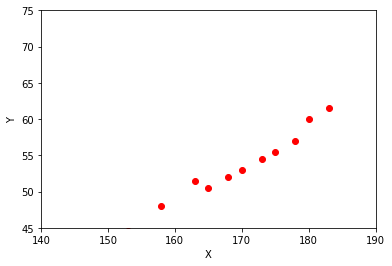

(13, 1)

In [ ]:
#Tạo X
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# Tạo Y 
y = np.array([[ -33+0.5*i[0] + random.randint(1,3) for i in X]]).T
# Vẽ thử các điểm dữ liệu
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
y.shape

w =  [[-34.32421765]
 [  0.51766751]]


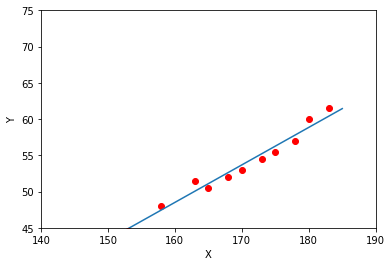

In [ ]:
# Thêm 1 vào X
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Tính W
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Tạo một đường thẳng model
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Vẽ fitting line
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


#Bài tập

1. Hãy dùng bộ dữ liệu dibetes để thiết lập mô hình Linear Regresion
2. Hãy tìm target values của diabetes_X_test rồi so sánh với target values trong diabetes_y_test
3. Tìm hiểu sklearn và làm lại yêu cầu câu 2 (câu cộng điểm)

In [ ]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train,diabetes_y_train=diabetes_X[:-2],diabetes_y[:-2].reshape(1,-1).T
diabetes_X_test,diabetes_y_test=diabetes_X[-2:],diabetes_y[-2:].reshape(1,-1).T